#Solving Time Independent Schrodinger Equation

- We want to compute time Independent solution of Schrodinger equation.
Here we take three examples: Harmonic Oscillator, Half harmonic oscillator and Square potential well.
- To solve these problems we use a well known methods to solve differential equations called finite difference method.
- All the equation written here are in dimensionless formalism

## Harmonic Potential

Potential $V(x) = \frac{1}{2}m\omega^2x^2 \


Schrodinger equation:
$$\frac{-1}{2}\frac{∂^2\psi}{\partial x^2} + V(x)ψ = EΨ$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

In [ ]:
N= 1000 #total steps
u = np.linspace(-6,6,N+1)
du= u[1]-u[0]

In [ ]:
#potential
def pot(y):
  return (0.5*y**2)
V = pot(u)

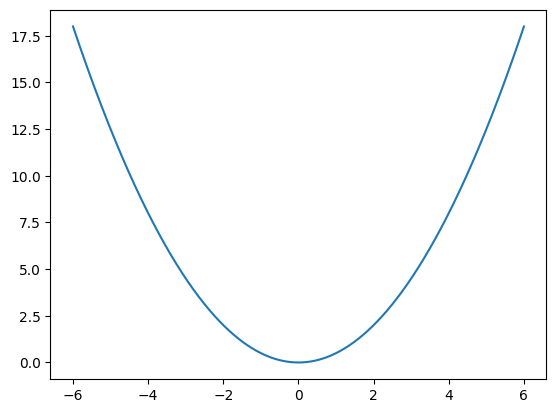

In [ ]:
plt.plot(u,V)

In [ ]:
# create a triadiagonal matrix
d = (1/du**2) + V[1:-1] # diagonal, not including first and last point wavefunction bcz they are zero du to B.C.
o = -(1/(2*du**2)) * np.ones(len(d)-1) # offdiagonal


In [ ]:
w , v = eigh_tridiagonal(d,o)

In [ ]:
psi =v.T

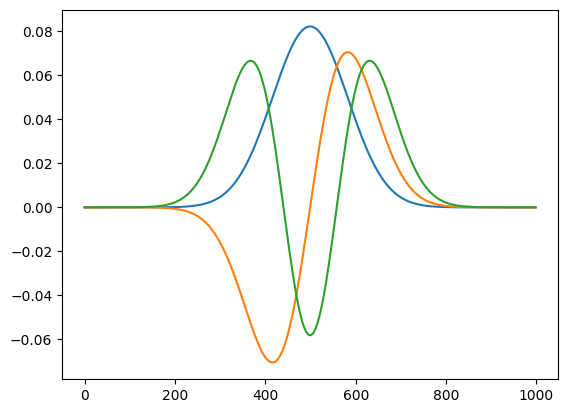

In [ ]:
plt.plot(psi[0])
plt.plot(psi[1])
plt.plot(psi[2])

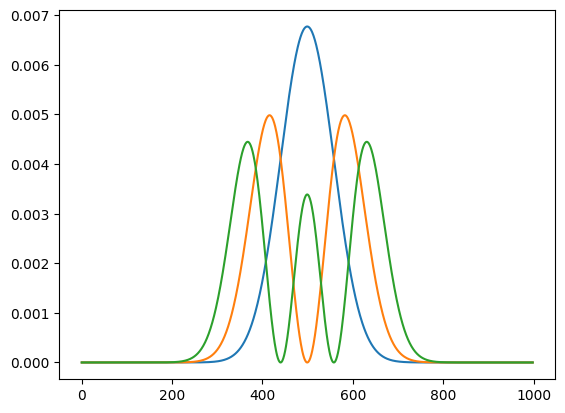

In [ ]:
#probability density
plt.plot(psi[0]**2)
plt.plot(psi[1]**2)
plt.plot(psi[2]**2)

Text(0, 0.5, '$\\hbar \\omega $')

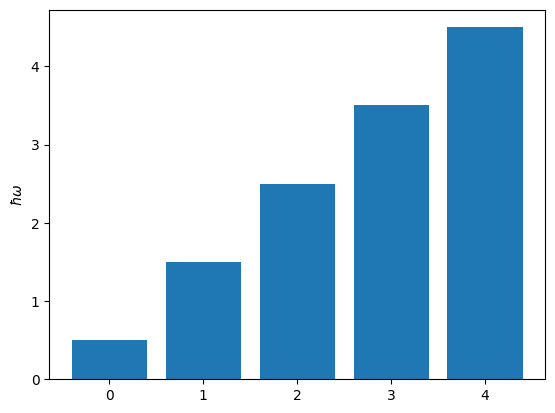

In [ ]:
plt.bar(np.arange(0,5,1),w[0:5])
plt.ylabel('$\hbar \omega $')

In [ ]:
# we can check energies i.e. E = n+1/2
E=w[0:5] # first 5
E

array([0.4999955 , 1.4999775 , 2.4999415 , 3.4998875 , 4.49981549])

## Half Harmonic Oscillator


$V(x) = \begin{cases}
   \frac{1}{2}m\omega^2x^2 & ; \text{x < 0 } \\
  ∞ & ; \text{ otherwise}
\end{cases}$

In [3]:
N = 1000
x = np.linspace(0,6,N+1)
V = 0.5*x**2
du=x[1]-x[0]

Text(0, 0.5, 'V(x)')

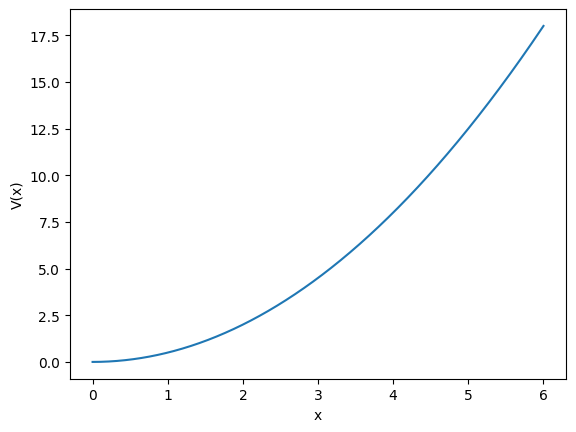

In [4]:
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')

In [ ]:
# create a triadiagonal matrix
d = (1/du**2) + V[1:-1] # diagonal, not including first and last point wavefunction bcz they are zero du to B.C.
o = -(1/(2*du**2)) * np.ones(len(d)-1) # offdiagonal

In [ ]:
w , v = eigh_tridiagonal(d,o)

In [ ]:
psi =v.T

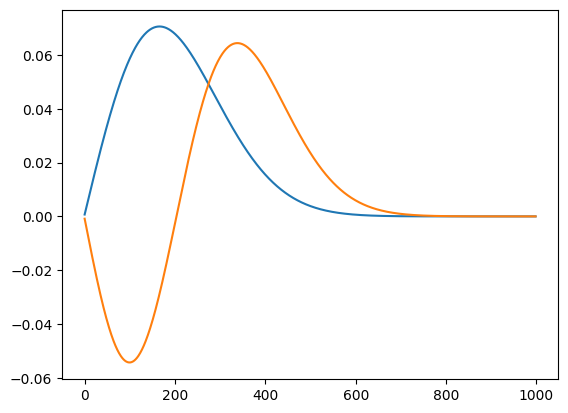

In [ ]:
plt.plot(psi[0])
plt.plot(psi[1])


In [ ]:
# we can check energies i.e. E = n+1/2 where n is odd only
E=w[0:5] # first 5
E

array([1.49999437, 3.49997187, 5.49993139, 7.49987414, 9.49984632])

## Finite Square Well

$V(x) = \begin{cases}
  -V_0  & ; \text{-a < x < a } \\
  0 & ; \text{ otherwise}
\end{cases}$

In [ ]:
N = 100000
x = np.linspace(-3,3,N+1)
dx = x[1]-x[0]
V0 = 18

In [ ]:
V = -V0*((x>=-1)*(x<=1)).astype(float)

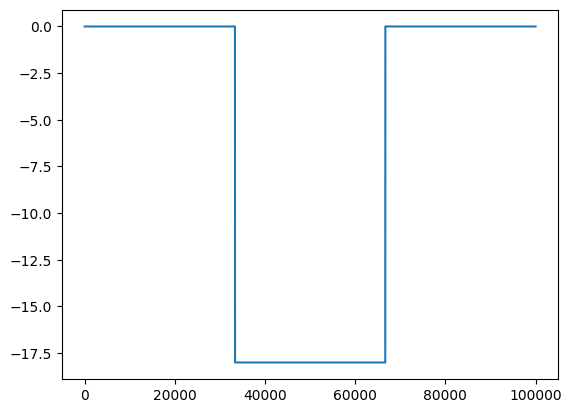

In [ ]:
plt.plot(V)

In [ ]:
# create a triadiagonal matrix
d = (1/dx**2) + V[1:-1] # diagonal, not including first and last point wavefunction bcz they are zero du to B.C.
o = -(1/(2*dx**2)) * np.ones(len(d)-1) # offdiagonal

In [ ]:
w , v = eigh_tridiagonal(d,o,select='v',select_range = (-V0,0)) # we are taking range of energy eigen-values between V0<E<0 => bound states

In [ ]:
psi = v.T

Text(0.5, 0, 'x/a')

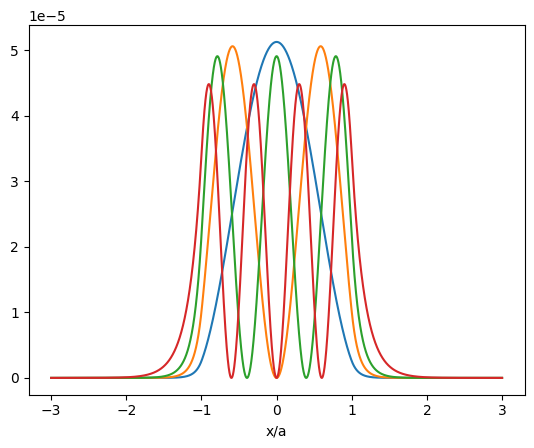

In [ ]:
plt.plot(x[1:-1],np.abs(psi[0])**2)
plt.plot(x[1:-1],np.abs(psi[1])**2)
plt.plot(x[1:-1],np.abs(psi[2])**2)
plt.plot(x[1:-1],np.abs(psi[3])**2)
plt.xlabel('x/a')


In [ ]:
w # energies

array([-17.09580686, -14.41200005, -10.05646483,  -4.34442346])